Have you ever experienced some sort of chest pain and immediately wondered whether you are having a heart attack? 
I remember experiencing chest pain multiple times in the past and becoming so paranoid of a heart attack or something that my parents would rush me to the hospital, only to find out it's nothing. 
Turns out many people experience chest pain and the reason isn't always something related to the heart.

So, in this project, we will look at patients who have complained of chest pain, and try to determine whether they actually have a heart disease or not. We will do this by taking various factors such as ecg, blood pressure etc. into consideration and building a machine learning model which predicts heart disease.

Importing the initial libraries needed.

In [1]:
import pandas as pd
import numpy as np                      
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

Reading the data from the csv file and making a copy to use in the project. This copy is made so that the initial dataset is present for reference, if needed.

In [3]:
data = pd.read_csv('processed.cleveland.data', header = None)
df = data.copy()

# Data Cleaning and Exploration

Looking at the data.

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


The column description on UCI Machine Learning Repository, from where the dataset has been acquired, is given below.

The following are the column names in our dataset and their descriptions, obtained from the same source of our dataset:

1) age: age of the patient

2) sex: gender of the patient

3) cp: type of chest pain (1:'Typical Angina', 2:'atypical angina', 3:'non-anginal pain', 4:'asymptomatic')

4) restbps: resting blood pressure (in mm Hg on admission to the hospital)

5) chol: serum  cholesterol in mg/dl 

6) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 

7) restecg: resting ECG results (0: 'normal', 1 and 2: 'abnormal')

8) maxhr: maximum heart rate achieved 

9) exang: exercise induced angina (1 = yes; 0 = no) 

10) oldpeak: ST depression induced by exercise relative to rest 

11) slope: the slope of the peak exercise ST segment (1: 'upsloping', 2: 'flat', 3: 'down sloping) 

12) mvf: number of major vessels (0-3) colored by fluoroscopy 

13) thal: thalassemia (3: 'normal', 6: 'fixed defect' , 7: 'reversible defect') 

14) ang: angiographic disease status (0: no heart disease, > 0: heart disease) 


Setting the column names.

In [5]:
column_names = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 
                'maxhr', 'exang', 'oldpeak', 'slope', 'mvf', 'thal', 'ang']
df.columns = column_names

In [6]:
df

,age,sex,cp,restbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mvf,thal,ang
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbps    303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
maxhr      303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
mvf        303 non-null object
thal       303 non-null object
ang        303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


All the columns are numerical except the the 'mvf' and 'thal' column, which are of object type. Trying to convert them to numerical throws the following error, (ValueError: could not convert string to float: '?')

So,'?' is replaced with np.nan, which represents numpy null values.

In [8]:
df = df.replace('?', np.nan)

In [9]:
df['thal'] = df['thal'].astype(float)

In [10]:
df['mvf'] = df['mvf'].astype(float)

Handling null values since most machine learning algorithms do not work with null values.

In [11]:
df.isnull().sum()

age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
maxhr      0
exang      0
oldpeak    0
slope      0
mvf        4
thal       2
ang        0
dtype: int64

In [12]:
df = df.dropna()

Checking the modified dhape of the dataset.

In [13]:
df.shape

(297, 14)

The target column,'ang' contains multiple values. Since all values > 0 just mean the same thing, i.e., heart disease, the target column is converted such that it has just 2 categories: 0 = no heart disease, 1 = heart disease.

In [14]:
values = []
for x in df['ang']:          
    if x > 0:
        values.append(1)
    else:
        values.append(0)

In [15]:
values

[0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,


In [16]:
df['ang'] = values

In [17]:
df['ang']

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: ang, Length: 297, dtype: int64

In [18]:
df

,age,sex,cp,restbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mvf,thal,ang
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


Checking some basic statistics.

In [19]:
df.describe()

,age,sex,cp,restbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mvf,thal,ang
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Plotting the target column to see whether it is imbalanced.

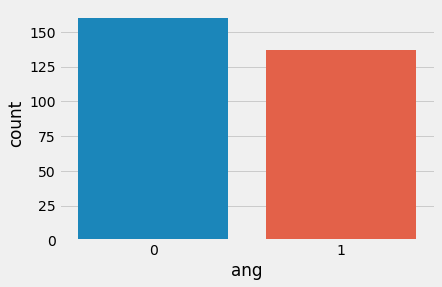

In [20]:
sns.countplot(df['ang'])

It is imbalanced but not much.

Computing the correlation of all the variables and plotting them.

In [21]:
df.corr()

,age,sex,cp,restbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mvf,thal,ang
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
restbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
maxhr,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


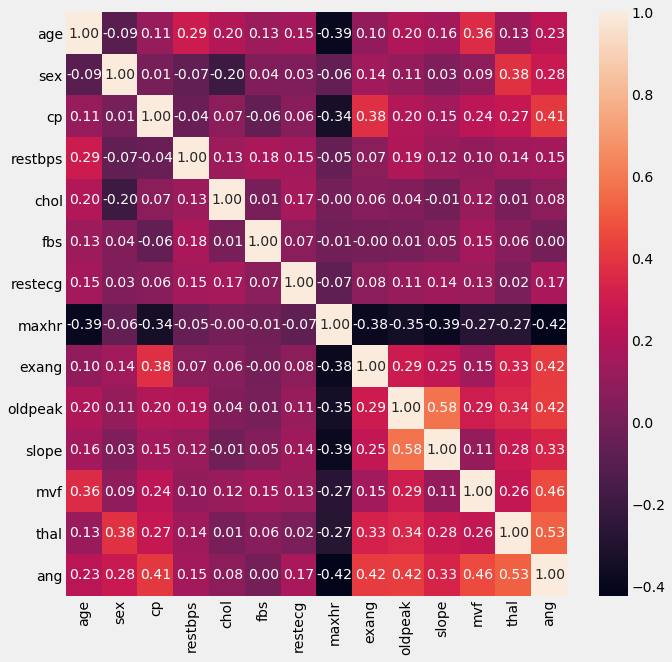

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

The 'fbs' column is dropped since it has very little correlation with the target label 'ang'.

In [23]:
df.drop('fbs', axis=1, inplace=True)

# Machine Learning

Splitting the data into training and test sets.

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('ang', axis=1)
y = df['ang']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Scaling the features since some machine learning algorithms perform better when the data is scaled.

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Model. 

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0)

Using GridSearchCV to determine the optimal value for the C parameter before fitting the model.

In [27]:
from sklearn.model_selection import GridSearchCV

grid_values = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(lr, param_grid = grid_values, cv=5, iid=False)
grid_lr.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_lr.best_params_)
print('Grid best score (accuracy): ', grid_lr.best_score_)

Grid best parameter (max. accuracy):  {'C': 10}
Grid best score (accuracy):  0.8464426877470356


Since the optimal value for C found by Grid Search is 10,the model is redefined and then trained.

In [28]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000, C=10, random_state=0).fit(X_train, y_train)

All the models are first trained and then evaluated together in the end so that its easier to compare them.

K-Nearest Neighbours Classifier:

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [30]:
grid_values = {'n_neighbors': [5, 10, 15, 20, 25]}
grid_knn = GridSearchCV(knn, param_grid = grid_values, cv=5, iid=False)
grid_knn.fit(X_train_scaled, y_train)

print('Grid best parameter (max. accuracy): ', grid_knn.best_params_)
print('Grid best score (accuracy): ', grid_knn.best_score_)

Grid best parameter (max. accuracy):  {'n_neighbors': 20}
Grid best score (accuracy):  0.8185770750988143


In [31]:
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train_scaled, y_train)

Linear Support Vector Machine:

In [32]:
from sklearn.svm import SVC

lsvc = SVC(kernel = 'linear', random_state=0)

In [33]:
grid_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_lsvc = GridSearchCV(lsvc, param_grid = grid_values, cv=5, iid=False)
grid_lsvc.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_lsvc.best_params_)
print('Grid best score (accuracy): ', grid_lsvc.best_score_)

Grid best parameter (max. accuracy):  {'C': 0.1}
Grid best score (accuracy):  0.8464426877470356


In [34]:
lsvc = SVC(kernel = 'linear', C=0.1, random_state=0).fit(X_train, y_train)

Kernelized Support Vector Machine:

In [35]:
ksvc = SVC(kernel='rbf', random_state=0)

In [36]:
grid_values = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_clf_ksvc = GridSearchCV(ksvc, param_grid = grid_values, cv=5, iid=False)
grid_clf_ksvc.fit(X_train_scaled, y_train)

print('Grid best parameter (max. accuracy): ', grid_clf_ksvc.best_params_)
print('Grid best score (accuracy): ', grid_clf_ksvc.best_score_)

Grid best parameter (max. accuracy):  {'C': 10, 'gamma': 0.01}
Grid best score (accuracy):  0.841501976284585


In [37]:
ksvc = SVC(kernel='rbf', C=10, gamma=0.01, random_state=0).fit(X_train_scaled, y_train)

Random Forest:

In [38]:
from sklearn.ensemble import RandomForestClassifier

fo = RandomForestClassifier(random_state=0)

In [39]:
grid_values = {'n_estimators': [10, 100], 'max_depth': [1, 2, 4, 6, 8, 10], 'min_samples_leaf': [4, 6, 8, 10, 12, 14]}
grid_clf_fo = GridSearchCV(fo, param_grid = grid_values, cv=5, iid=False)
grid_clf_fo.fit(X_train, y_train)

print('Grid best parameter (max. accuracy): ', grid_clf_fo.best_params_)
print('Grid best score (accuracy): ', grid_clf_fo.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 6, 'min_samples_leaf': 4, 'n_estimators': 10}
Grid best score (accuracy):  0.8373517786561265


In [40]:
fo = RandomForestClassifier(max_depth=6, min_samples_leaf=4, n_estimators=10, random_state=0).fit(X_train, y_train)

Evaluating and comparing all the models.

By comparing the different accuracies found by grid search, it can be seen that the logistic regression and linear svm models have the best accuracy, followed by other models. The worst testing accuracy belongs to the k-nearest neighbors model.

Confusion Matrix:

In [41]:
from sklearn.metrics import confusion_matrix

def confusion(model):
    model_predicted = model.predict(X_test)
    matrix = confusion_matrix(y_test, model_predicted)
    print(matrix)
    
def confusion1(model):
    model_predicted = model.predict(X_test_scaled)
    matrix = confusion_matrix(y_test, model_predicted)
    print(matrix)

In [42]:
print('lr:',confusion(lr))
print('\n')
print('knn:',confusion1(knn))
print('\n')
print('lsvc:',confusion(lsvc))
print('\n')
print('ksvc:',confusion1(ksvc))
print('\n')
print('fo:',confusion(fo))

[[37  2]
 [ 9 27]]
lr: None


[[37  2]
 [12 24]]
knn: None


[[37  2]
 [ 9 27]]
lsvc: None


[[37  2]
 [10 26]]
ksvc: None


[[35  4]
 [10 26]]
fo: None


It can be seen that the lr and lsvc models have the least amount of false negatives.

Classification Report:

In [43]:
from sklearn.metrics import classification_report

print('lr:', classification_report(y_test, lr.predict(X_test)))
print('\nknn:', classification_report(y_test, knn.predict(X_test_scaled)))
print('\nlsvc:', classification_report(y_test, lsvc.predict(X_test)))
print('\nksvc:', classification_report(y_test, ksvc.predict(X_test_scaled)))
print('\nfo:', classification_report(y_test, fo.predict(X_test)))

lr:               precision    recall  f1-score   support

           0       0.80      0.95      0.87        39
           1       0.93      0.75      0.83        36

    accuracy                           0.85        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.87      0.85      0.85        75


knn:               precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.92      0.67      0.77        36

    accuracy                           0.81        75
   macro avg       0.84      0.81      0.81        75
weighted avg       0.84      0.81      0.81        75


lsvc:               precision    recall  f1-score   support

           0       0.80      0.95      0.87        39
           1       0.93      0.75      0.83        36

    accuracy                           0.85        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.87      0.85      0.85        75


k

The best overall scores, once again, belong to the lr and lsvc models.

Hence we can choose either the logistic regression or the linear support vector machine model since they both give the best results at every step.